# **Desafío Data Scientist Latam Airlines** 🛩️📚

- Autor: Matías Rojas
- Fecha de entrega: 01 de Abril
- Nombre de usuario en GitHub: matirojasg
- Link al repositorio: [https://github.com/matirojasg/data-scientist-challenge](https://github.com/matirojasg/data-scientist-challenge)
- Email: matirojasga@gmail.com

## **Contenido**
[Introducción](#intro) 

[Exploración de datos](#exploración)

[Preprocesamiento](#exploración)

[Entrenamiento de modelos](#model)


## **Introducción** <a name="intro"></a>

La puntualidad en los vuelos es un factor crucial en la industria de la aviación. Cuando los vuelos se atrasan, los pasajeros pueden perder conexiones, reuniones o eventos importantes. Además, los retrasos también pueden generar costos significativos para las aerolíneas, desde pérdida de ingresos por cancelaciones de vuelos hasta penalizaciones financieras por no cumplir con los tiempos de llegada y salida previamente establecidos.

Es por eso que la capacidad de predecir la probabilidad de retraso de un vuelo puede ser extremadamente valiosa para las aerolíneas y sus clientes. Al poder identificar los factores que podrían provocar un retraso, las aerolíneas pueden tomar medidas preventivas para minimizar las interrupciones y mejorar así la satisfacción de los clientes. Además, esta información puede ayudar a los pasajeros a tomar decisiones informadas al planificar sus viajes, permitiéndoles elegir aerolineas y rutas con un menor riesgo de retraso.

En este desafío, se trabajará con un conjunto de datos de vuelos que han llegado o salido desde Chile. En particular, se realizará un análisis exploratorio sobre los datos para así construir un modelo óptimo que permita predecir la probabilidad de retraso de un vuelo. Se examinarán diversas variables que podrían estar relacionadas con los retrasos, como el tiempo de espera en la pista, las condiciones climáticas, el tipo de avión y la aerolínea operadora. A partir de esta información, se entrenará un modelo basado en aprendizaje supervisado capaz de predecir la probabilidad de retraso de un vuelo con una precisión razonable.

En resumen, este proyecto tiene como objetivo proporcionar una herramienta útil para las aerolíneas y los pasajeros, permitiendo una mejor planificación y una mayor eficiencia en la gestión de los vuelos.

### **Descripción del conjunto de datos**

Según el enunciado, el conjunto de datos almacenado en el archivo `dataset_SCL.csv` contiene datos públicos y reales acerca de los vuelos que despegaron o arribaron a Chile en el año 2017. A continuación se detallan las columnas y su descripción:

|Atributo|	Descripción|
|---|:-----------------:|
|Fecha-I|	Fecha y hora programada del vuelo.|
|Vlo-I|	Número de vuelo programado.|
|Ori-I|	Código de ciudad de origen programado.|
|Des-I|	Código de ciudad de destino programado.|
|Emp-I|	Código de aerolínea de vuelo programado.|
|Fecha-O|	Fecha y hora de operación del vuelo.|
|Vlo-O|	Número de operación del vuelo.|
|Ori-O|	Código de ciudad de origen de la operación.|
|Des-O|	Código de ciudad de destino de la operación.|
|Emp-O|	Código de aerolínea de la operación del vuelo.|
|DIA|	Día del mes de la operación del vuelo.|
|MES|	Número del mes de la operación del vuelo.|
|AÑO|	Año de la operación del vuelo.|
|DIANOM|	Día de la semana de la operación del vuelo.|
|TIPOVUELO|	Tipo de vuelo, I = Internacional, N = Nacional.|
|OPERA|	Nombre de la aerolínea que opera el vuelo.|
|SIGLAORI|	Nombre de la ciudad de origen.|
|SIGLADES|	Nombre de la ciudad de destino.|

### **Estructura del informe**

El informe estará estructurado en tres secciones principales: análisis exploratorio, modelamiento y propuesta de mejoras. Las respuestas a las preguntas planteadas en el enunciado se irán desarrollando ha medida que se avanza en los experimentos. Cabe mencionar que los atributos nuevos solicitados y los gráficos generados serán descritos en Español para mantener la consistencia de idioma con el conjunto de datos entregado.

En la sección de análisis exploratorio, se examinarán los datos proporcionados sobre los vuelos y se realizará una exploración detallada de los mismos, principalmente un análisis univariado/multivariado de las variables categóricas y numéricas. Se utilizarán técnicas de visualización de datos para identificar patrones y relaciones que puedan ser relevantes para generar las características de entrada del modelo.

En la sección de modelamiento, se propondrán distintos modelos que permitan predecir la probabilidad de retraso de los vuelos. Se explorarán diferentes algoritmos de aprendizaje automático y se seleccionará el más adecuado para el conjunto de datos. También se evaluará el rendimiento del modelo y se ajustará según sea necesario.

Finalmente, en la sección de mejoras, se propondrán posibles mejoras para el modelo. Esto podría incluir la inclusión de nuevas características o la optimización de los parámetros del modelo existente para mejorar la precisión de las predicciones. 

## **Exploración de datos** <a name="exploración"></a>

In [93]:
# Librerías útiles para la fase de exploración.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')

### **Lectura del dataset**

La lectura del dataset será realizada directamente desde el repositorio de GitHub, de manera que el revisor sólo deba ejecutar las celdas de código.

In [94]:
%%capture
!wget https://raw.githubusercontent.com/matirojasg/Challenge-Data-Scientist/development/data/dataset_SCL.csv # Se descarga el archivo con el método get y queda situado en el ambiente de trabajo

In [95]:
df_flights = pd.read_csv('dataset_SCL.csv', low_memory=False) # Se deja low_memory=False según la siguiente indicación: "DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False."

### **Exploración inicial**

In [96]:
# Vista general de los primeros 3 elementos.
df_flights.head(3)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami


In [97]:
# Índice del dataframe
print(df_flights.index)

RangeIndex(start=0, stop=68206, step=1)


Dado que múltiples vuelos pueden estar programados (Fecha-I) sobre la misma fecha y hora, esta columna no es útil para ser utilizada como índice del dataframe. Esta información podría ser útil, ya que si hay muchos vuelos agendados sobre la misma hora, podría provocar algún retraso en el proceso de embarcas/aduana/etc.

In [98]:
# Tamaño del dataset.
print(f'El dataset tiene {df_flights.shape[0]} filas y {df_flights.shape[1]} atributos.')

El dataset tiene 68206 filas y 18 atributos.


En general se puede apreciar que la cantidad de datos no es muy grande, lo que nos puede dar un indicio de qué tipo de modelos podrían adaptarse mejor a este problema. Según la documentación original de Scikit-Learn (modelos que otorgan buena explicabilidad), encontramos la siguiente selección de algoritmos, que si bien no es estricto, es un buen indicio.

![scikit-learn algorithms](https://scikit-learn.org/stable/_static/ml_map.png)

De la imagen, podemos ver que si planteamos el problema como una clasificación (vuelo se atrasa/no) podría ser útil el algoritmo SGD Classifier. Sin adelantarnos, más adelante podríamos comprobar esta pequeña hipótesis.

In [99]:
# Tipo de datos
print(df_flights.dtypes)

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object


In [100]:
# Frecuencia por tipo de datos
print(df_flights.dtypes.value_counts())

object    15
int64      3
dtype: int64


Viendo la tabla anterior, podemos concluir que el mayor desafío en la parte de la elección de features será tratar las variables categóricas, ya que son mayoritarias. Por otro lado, las variables numéricas sólo entregan información acerca de la fecha.

In [101]:
# Eliminamos datos duplicados en caso que los hayan.
original_len = len(df_flights)
df_flights = df_flights.drop_duplicates()
print(f'Se eliminaron {original_len - df_flights.shape[0]} datos al remover duplicados.')

Se eliminaron 0 datos al remover duplicados.


Notamos que no existen filas duplicadas, por lo que cumple con la normalización 1FN al menos. 

In [102]:
# Verificamos si existen datos nulos.
df_flights.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [103]:
# Vemos la fila que contiene ese datos nulo
df_flights[df_flights["Vlo-O"].isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


Podemos notar que existe 1 dato nulo correspondiente a la columna Vlo-O, la cuál está asociada al número de operación del vuelo. Una buena aproximación sería considerar que el número de operación es equivalente al número del vuelo programado. Por lo tanto, se imputa el valor de Vlo-O con el valor de la columna Vlo-I

In [104]:
missing_index = df_flights[df_flights["Vlo-O"].isnull()].index
df_flights.loc[missing_index, "Vlo-O"] = df_flights.loc[missing_index, "Vlo-I"]

In [105]:
# Comprobamos que ya no hayan valores nulos en esa columna
df_flights.loc[missing_index]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,200,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [106]:
# Finalmente las columnas con fechas, son transformadas desde el formato object a datetime. Esto nos permitirá construir nuevas características a partir de esas columnas.
df_flights["Fecha-I"] = pd.to_datetime(df_flights["Fecha-I"])
df_flights["Fecha-O"] = pd.to_datetime(df_flights["Fecha-O"])

### **Análisis y distribución de datos**

#### **Análisis Datos Numéricos**



In [107]:
# Seleccionamos sólo los datos numéricos.
df_flights_num_features = df_flights.select_dtypes("number")
df_flights_num_features

,DIA,MES,AÑO
0,1,1,2017
1,2,1,2017
2,3,1,2017
3,4,1,2017
4,5,1,2017
...,...,...,...
68201,22,12,2017
68202,25,12,2017
68203,27,12,2017
68204,29,12,2017


In [108]:
# Obtenemos una estadística directa sobre las variables numéricas
df_flights_num_features.describe().round()

,DIA,MES,AÑO
count,68206.0,68206.0,68206.0
mean,16.0,7.0,2017.0
std,9.0,4.0,0.0
min,1.0,1.0,2017.0
25%,8.0,3.0,2017.0
50%,16.0,7.0,2017.0
75%,23.0,10.0,2017.0
max,31.0,12.0,2018.0


In [109]:
df_flights_num_features['AÑO'].nunique()

2

Como se puede apreciar en las tablas anteriores, los datos numéricos sólo corresponden a datos asociados a fechas, es decir, los días desde 1 a 31, meses de 1 a 12, y años 2017 y 2018. Para obtener mayor información sobre el grado de dispersión de estos atributos comenzaremos con el análisis univariado numérico. Como las variables están en órdenes de magnitud muy distintos, hacemos boxplots del logaritmo en base 10 de los datos.

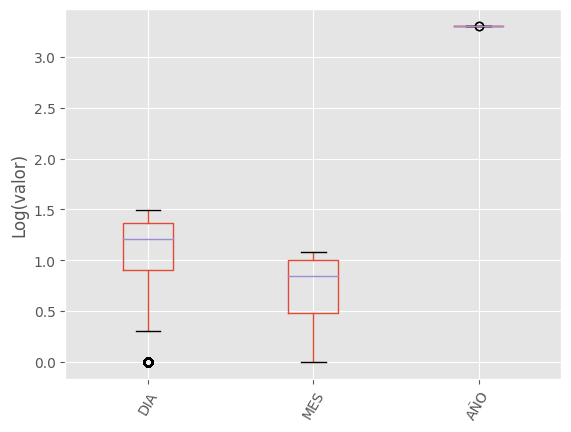

In [110]:
(np.log(df_flights_num_features)/np.log(10)).boxplot()
plt.xticks(rotation = 60)
plt.ylabel("Log(valor)")
plt.show()

Podemos observar que la variable año tiene un orden de magnitud muy elevado en comparación a las otras variables, lo que es directo del significado del atributo. En general se ven uniformes las distribuciones, pero como este gráfico no nos entrega mucha información, se analizarán por separadas cada una de estas variables.

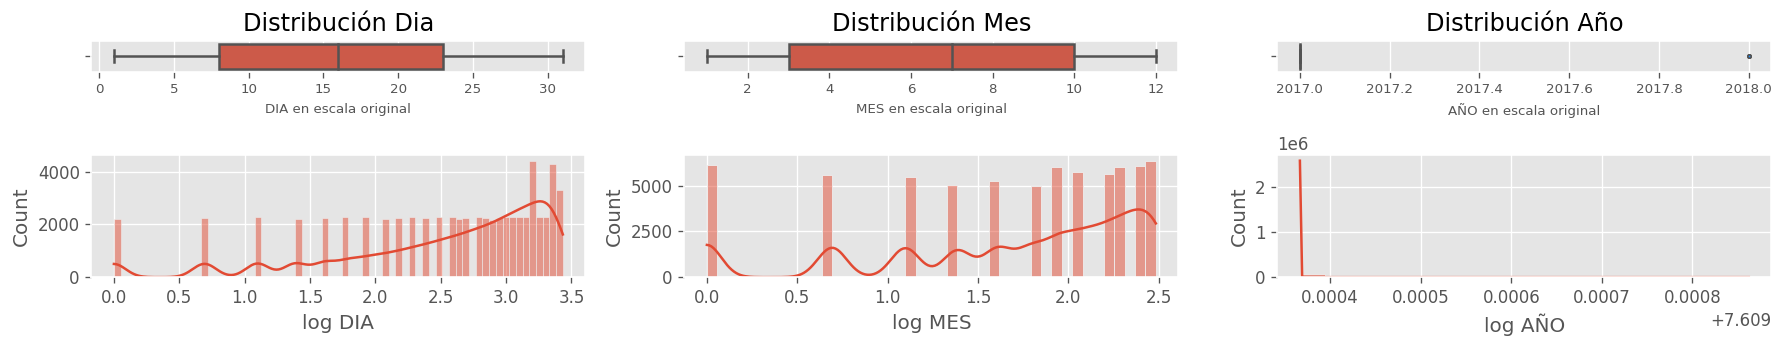

In [111]:
_, axes = plt.subplots(2, 3, figsize=(15, 3), sharey=False, sharex=False,
                       dpi=120,
                       gridspec_kw={"height_ratios": (.1, .4)})
flat_axes = axes.ravel()

for i, c in enumerate(df_flights_num_features.columns):
  data = np.log(df_flights_num_features[c] + 0.0001)
  sns.boxplot(x=df_flights_num_features[c], ax=flat_axes[i],
              flierprops={"markersize":2, "linewidth": 0,
                          "markerfacecolor":"dodgerblue", "marker":"o",
                          "color": "dodgerblue"})
  sns.histplot(x=data, kde=True, ax=flat_axes[i+3])
  flat_axes[i].set_title(f"Distribución {c.replace('_', ' ').title()}")
  flat_axes[i].set_xlabel(f"{c} en escala original", size=8)
  flat_axes[i+3].set_xlabel(f"log {c}")
  flat_axes[i].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()

Del gráfico anterior, podemos concluir que la distribución de datos en los 3 atributos no presenta outliers, con excepción de dos datos que son del mes de Enero del año 2018.

In [112]:
def plot_histogram(df, column, width=5, height=8):
  plt.figure(figsize=(width,height))
  sns.countplot(y=df[column], data=df, orient="h")
  plt.xlabel("Número de vuelos")
  plt.ylabel(column)
  plt.title(f"Frecuencia de vuelos según el {column}")
  plt.show()

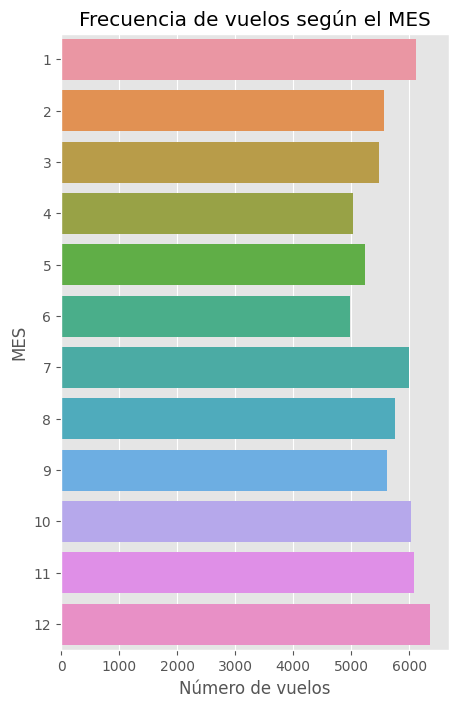

In [113]:
plot_histogram(df_flights_num_features, 'MES')

A simple vista se puede ver como la mayor cantidad de vuelos se presenta en los meses de Enero, Noviembre y Diciembre, que corresponden a la época de verano en Chile. Por otro lado, una excepción es el mes de Julio, que corresponde a Verano en destinos internacionales solicitado (Europa, Estados Unidos).

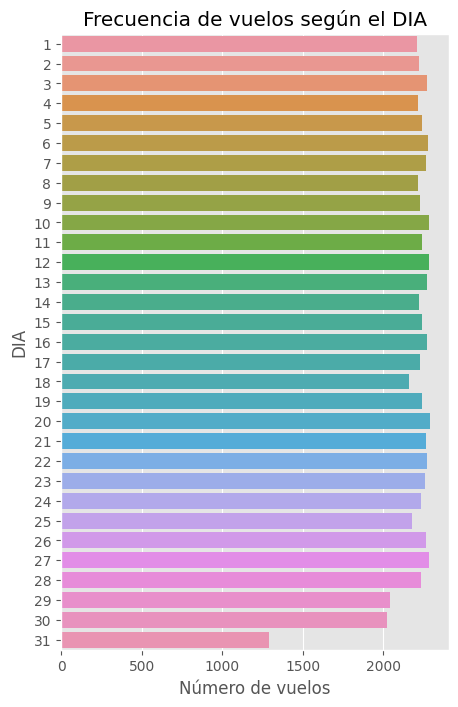

In [114]:
plot_histogram(df_flights_num_features, 'DIA')

En el caso de los díoas lo que podemos apreciar es que la cantidad de vuelos se reduce considerablemente el día 31. Una explicación lógica a este fenómeno es que 7 meses del año solamente contienen 31 días. El resto podemos ver que varía poco, por lo que directamente no se podrían sacar conclusiones. 

#### **Análisis Datos Categóricos**

Comenzaremos con un análisis univariado de los datos categóricos.

In [115]:
# Filtramos sólo los datos categóricos.
df_flights_cat_features = df_flights.select_dtypes("object")
df_flights_cat_features.head()

,Vlo-I,Ori-I,Des-I,Emp-I,Vlo-O,Ori-O,Des-O,Emp-O,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,226,SCEL,KMIA,AAL,226,SCEL,KMIA,AAL,Domingo,I,American Airlines,Santiago,Miami
1,226,SCEL,KMIA,AAL,226,SCEL,KMIA,AAL,Lunes,I,American Airlines,Santiago,Miami
2,226,SCEL,KMIA,AAL,226,SCEL,KMIA,AAL,Martes,I,American Airlines,Santiago,Miami
3,226,SCEL,KMIA,AAL,226,SCEL,KMIA,AAL,Miercoles,I,American Airlines,Santiago,Miami
4,226,SCEL,KMIA,AAL,226,SCEL,KMIA,AAL,Jueves,I,American Airlines,Santiago,Miami


In [116]:
# Guardamos en una lista los nombres de las columnas categóricas
cat_cols = list(df_flights_cat_features.columns)
print(cat_cols)

['Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Vlo-O', 'Ori-O', 'Des-O', 'Emp-O', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES']


In [117]:
# Obtenemos el conteo de los valores únicos
df_flights_cat_features.nunique()

Vlo-I        584
Ori-I          1
Des-I         64
Emp-I         30
Vlo-O        861
Ori-O          1
Des-O         63
Emp-O         32
DIANOM         7
TIPOVUELO      2
OPERA         23
SIGLAORI       1
SIGLADES      62
dtype: int64

De la tabla anterior es interesante notar como algunas columnas categóricas poseen una cantidad de datos únicos significativamente mayor a otras, como es el caso de los números asociados a los vuelos, o los códigos de los orígenes y destinos. Por otro lado, y como era de esperar, existe un valor único en Ori-I, SIGLAORI, Ori-O ya que los vuelos parten desde Chile. A continuación visualizaremos las columnas que poseen una cantidad razonable de categorías, junto a la frecuencia.

A continuación se realizará un gráfico tipo histograma para un subconjunto de estas variables.

**Código de ciudad de destino programado (Des-I)**

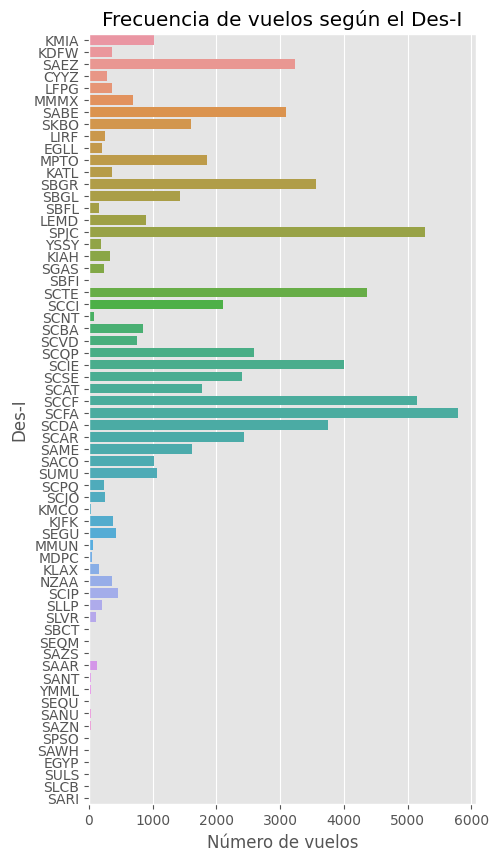

In [118]:
plot_histogram(df_flights_cat_features, "Des-I", width=5, height=10)

Del gráfico anterior podemos apreciar que hay un alto grado de dispersión en esta variable. Por lo que será interesante contrastarla después con lo que sería la tasa de retraso de los vuelos. Un país con muchos vuelos solicitados y una alta tasa de retraso podría significar grandes problemas para la aerolinea.

**Código de aerolínea de vuelo programado (Emp-I)**

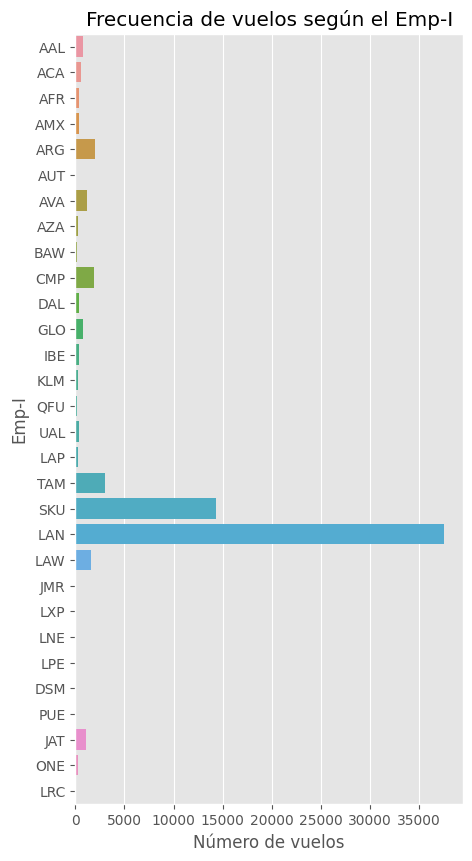

In [119]:
plot_histogram(df_flights_cat_features, "Emp-I", 5, 10)

In [120]:
df_flights_cat_features["Emp-I"].value_counts()/len(df_flights_cat_features)*100

LAN    55.143243
SKU    20.962965
TAM     4.470281
ARG     2.857520
CMP     2.712371
LAW     2.307715
AVA     1.689001
JAT     1.605431
GLO     1.181714
AAL     1.109873
ACA     0.828373
IBE     0.530745
AFR     0.524881
DAL     0.524881
AMX     0.514617
UAL     0.491159
ONE     0.409055
AZA     0.379732
KLM     0.368003
LAP     0.316688
BAW     0.300560
QFU     0.285899
JMR     0.146615
LRC     0.134885
AUT     0.108495
PUE     0.071841
LXP     0.013195
LPE     0.005865
DSM     0.002932
LNE     0.001466
Name: Emp-I, dtype: float64

Respecto al gráfico anterior y usando la tabla de frecuencia relativa porcentual, vemos que la mayor concentración de vuelos programados son por parte de la aerolinea LAN, seguido por SKY AIRLINE. Ambas concentran el 76% de los vuelos aproximadamente.

**Código de ciudad de destino de la operación (Des-O)**

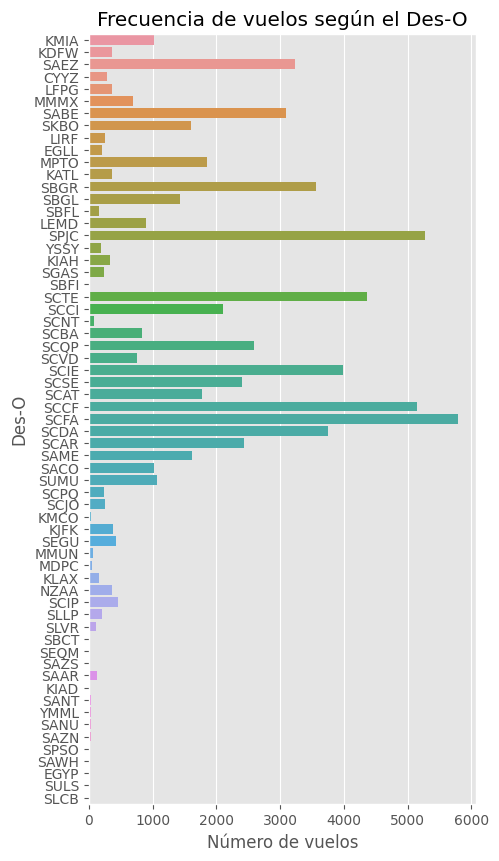

In [121]:
plot_histogram(df_flights_cat_features, "Des-O", 5, 10)

En este caso, podemos ver que la distribución de datos de los códigos de la ciudad de destino es similar al de la ciudad de origen. Pero como no tenemos mayor información sobre que ciudades son, nos fijaremos mejor en los atributos SIGLADES.

**Nombre de la ciudad de destino (SIGLADES)**

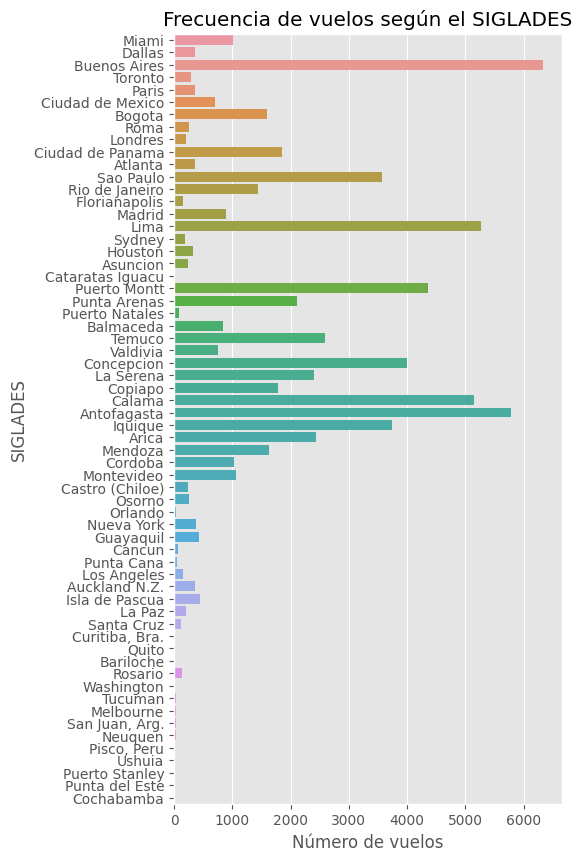

In [122]:
plot_histogram(df_flights_cat_features, "SIGLADES", 5, 10)

In [123]:
(df_flights_cat_features["SIGLADES"].value_counts()/len(df_flights_cat_features))*100

Buenos Aires      9.288039
Antofagasta       8.483125
Lima              7.726593
Calama            7.544791
Puerto Montt      6.388001
                    ...   
Quito             0.002932
Washington        0.001466
Pisco, Peru       0.001466
Puerto Stanley    0.001466
Cochabamba        0.001466
Name: SIGLADES, Length: 62, dtype: float64

El gráfico anterior nos entrega bastante información sobre los vuelos, y potencialmente podría ser un buen atributo para el modelo. Podemos ver que las ciudades con mayor frecuencia son Buenos Aires, Antofagasta y Lima, mientras que las de menor frecuencia son ciudades de Europa y otros continentes.

**Nombre de la aerolínea que opera el vuelo (OPERA)** 

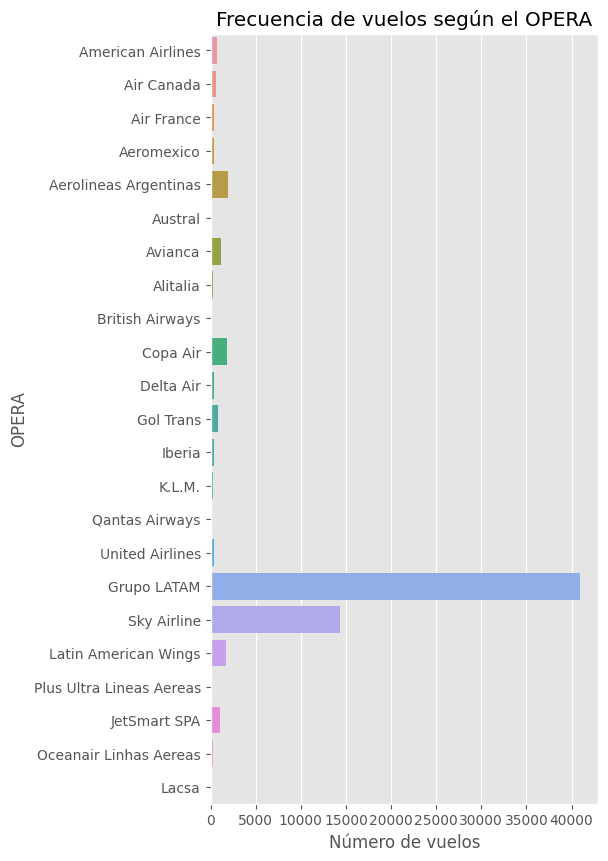

In [124]:
plot_histogram(df_flights_cat_features, "OPERA", 5, 10)

**Tipo de vuelo, I = Internacional, N = Nacional (TIPOVUELO)**

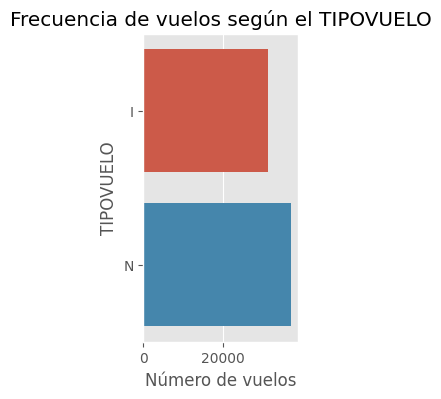

In [125]:
plot_histogram(df_flights_cat_features, "TIPOVUELO", 2,4)

Este gráfico es interesante, podemos ver que existe un balance entre la cantidad de vuelos nacionales e internacionales, lo que sustenta la hipótesis de que es atractivo viajar a destinos cercanos, por distintas razones que serán analizadas más adelante. 

#### **Pregunta 1. ¿Cómo están distribuidos los datos? ¿Encontraste alguna información destacable para compartir? ¿Qué conclusiones puedes obtener de esto?**

Para ordenar los hallazgos encontrados, se realizará un análisis por separado entre las variables numéricas y categóricas. Recordar que este es un análisis solamente univariado para determinar la distribución de los datos. Más adelante, se dará a conocer un análisis multivariado considerando un atributo asociado a la tasa de retraso.

***Análisis numérico.***

Respecto a los datos numéricos, se puede apreciar que los meses con mayor cantidad de vuelos son Diciembre y Enero, mientras que en Junio existe una menor frecuencia. Existen varios factores que podrían explicar este fenómeno, entre los cuáles encontrados los siguientes:

Temporada del año: En el caso de Chile, Enero y Diciembre son meses de temporada alta debido a las vacaciones de verano, lo que podría explicar un mayor número de ofertas para vuelos nacionales e internacionales. Por el contrario, Junio es un mes de temporada baja en Chile debido al invierno.

Vacaciones: Extendiendo la idea anterior, dado que Diciembre y Enero son meses comúnmente utilizados por las familias Chilenas para salir de vacaciones, esto puede contribuir a un aumento en el número de visitas de familiares lejanos a sus familias, ir a la playa o simplemente salir a vacacionar a otros destinos. Por ejemplo, en estas fechas los jovenes no asisten a la escuela/universidad, por lo que se forma un escenario propicio para salir.

Condiciones climáticas: El clima en Santiago de Chile en Junio puede ser menos favorable para viajar en comparación con Enero y Diciembre. Junio es invierno en el hemisferio sur, y puede haber más lluvia y condiciones climáticas adversas, lo que podría afectar el número de vuelos programados. Esto afecta directamente algunos panoramas como ir a visitar el Desierto de Atacama o las Torres del Paine, que se ven afectados por la época del año.

***Análisis categórico.***

Lo primero que notamos en el análisis categórico es que columnas como Vlo-I y Vlo-O, correspondientes a códigos identificadores del vuelo, poseían una cantidad de valores posibles muy grande. Esto puede ser un problema si en el modelo creamos una columna por cada uno de los posibles valores, es decir, si utilizamos una transformación *one-hot encoder*.

A partir de los histogramas presentados, notamos que la gran cantidad de vuelos programados proviene de la aerolinea LAN, lo que tiene sentido ya que LATAM Airlines es la aerolínea más grande de América Latina y opera en varios países de la región, destinos más accesibles para los Chilenos. La segunda aerolinea más utilizada es SkyAirlines. En total, ambas aerolineas concentran el 76% de los vuelos descritos en este conjunto de datos.

Dado que las variables Ori-I, Ori-O y SIGLAORI tienen un valor único, esto nos sugiere que no deben ser utilizadas a la hora de entrenar un modelo, ya que sólo nos agregarían más dimensionalidad y complejidad al modelo.

Respecto a la variable SIGLADES, esta nos entrega bastante información acerca de los vuelos. Podemos ver que las ciudades de destino más frecuentes son; Antofagasta, Lima y Buenos Aires, abarcando el 24% de los vuelos aproximadamente. Algunas razones de por qué ocurre este comportamiento podrían ser:

1. Proximidad geográfica: Antofagasta, Lima y Buenos Aires se encuentran en Sudamérica, lo que los hace destinos más cercanos y accesibles desde Chile, comparado con destinos internacionales o en distintos continentes.

2. Relaciones comerciales y culturales: Chile tiene fuertes lazos comerciales y culturales con Perú y Argentina, lo que puede explicar por qué hay muchos vuelos entre estos países. 

3. Demanda de los pasajeros: Hay una demanda significativa de vuelos desde Chile a destinos como Antofagasta, Lima y Buenos Aires debido a la cantidad de pasajeros que viajan por motivos de trabajo (industria minera, pesquera, entre otras), turismo y visitas familiares.

4. Costo de los vuelos: Los vuelos a destinos cercanos pueden ser más económicos que los vuelos a destinos más lejanos, lo que puede explicar por qué los destinos de otros continentes son menos frecuentes.

Por último, el gráfico de vuelos nacionales versus internacionales, sustenta parte de las explicaciones anteriores. Podemos notar que existe un balance entre vuelos nacionales e internacionales, lo que podría explicarse por las características geográficas de Chile, es decir, un país angosto pero muy extenso en territorio. Estas características hacen que sea más fácil, rápido y económico para las personas viajar a otras partes del país en avión comparado a viajar a otros países en la región o en otros continentes. 

Por otro lado, la mayoría de los atractivos turísticos importantes en Chile se encuentran ya sea en el extremo sur como en el extremo norte, por lo que resulta atractivo poder visitarlos mediante un vuelo. Finalmente, y una razón más rebuscada puede ser que faltan más acuerdos bilaterales de aviación comercial entre Chile y otros países, puede que existan varias restricciones que deben cumplir las aerolineas extranjeras, reduciendo así la cantidad de opciones posibles.

## **Preprocesamiento** <a name="preprocesamiento"></a>

#### **Pregunta 2. Genera las siguientes columnas adicionales. Por favor, exportarlas a un archivo CSV llamado synthetic_features.csv:**

- temporada_alta: 1 si la fecha de salida (Fecha-I) está entre el 15 de diciembre y el 3 de marzo, o entre el 15 y el 31 de julio, o entre el 11 y el 30 de septiembre, 0 en caso contrario.
- dif_min: diferencia en minutos entre la fecha de llegada (Fecha-O) y la fecha de salida (Fecha-I).
- retraso_15: 1 si dif_min es mayor que 15, 0 en caso contrario.
- periodo_dia: mañana (entre las 5:00 y las 11:59), tarde (entre las 12:00 y las 18:59) y noche (entre las 19:00 y las 4:59), basado en la fecha de salida (Fecha-I).

Exporta estas columnas a un archivo CSV llamado synthetic_features.csv. 

In [126]:
# Creamos una copia por si queremos volver al dataframe original más adelante
df = df_flights.copy()

**Condición 1: Agregar la columna high_season**

In [127]:
def is_high_season(row):
    if (row["Fecha-I"] <= pd.Timestamp('2017-12-31')) & (row["Fecha-I"] >= pd.Timestamp('2017-12-15')) \
      or (row["Fecha-I"] <= pd.Timestamp('2017-03-03')) & (row["Fecha-I"] >= pd.Timestamp('2017-01-01')) \
      or (row["Fecha-I"] <= pd.Timestamp('2017-07-31')) & (row["Fecha-I"] >= pd.Timestamp('2017-07-15')) \
      or (row["Fecha-I"] <= pd.Timestamp('2017-09-30')) & (row["Fecha-I"] >= pd.Timestamp('2017-09-11')):
        return 1
    else:
        return 0

In [128]:
# Se aplica la condición sobre cada fila del dataframe
df['temporada_alta'] = df.apply(is_high_season, axis=1)

In [129]:
# Verificamos que tenga sentido lo realizados
df[['Fecha-I','temporada_alta']].sample(10)

,Fecha-I,temporada_alta
44437,2017-09-12 21:25:00,1
47950,2017-09-20 18:49:00,1
66794,2017-12-28 23:30:00,1
8863,2017-02-10 18:00:00,1
23131,2017-05-07 08:45:00,0
13019,2017-03-14 14:30:00,0
29881,2017-06-17 19:05:00,0
12172,2017-03-09 03:21:00,0
67685,2017-12-15 02:00:00,1
47060,2017-09-08 20:21:00,0


In [130]:
# Contamos la cantidad de vuelos que fueron realizados en temporada alta/baja.
df['temporada_alta'].value_counts()

0    46174
1    22032
Name: temporada_alta, dtype: int64

**Condición 2: Crear la columna dif_min**

In [131]:
df["dif_min"] = (df["Fecha-O"] - df["Fecha-I"]).dt.total_seconds() / 60

**Condición 3: Crear la columna delay_15**

In [132]:
df["retraso_15"] = np.where(df["dif_min"] > 15, 1, 0)
df["retraso_15"] = df["retraso_15"]

**Condición 4: Crear la columna period_day**

In [133]:
def classify_period(time):
    if time.hour >= 5 and time.hour < 12:
      return 'mañana'
    elif time.hour >= 12 and time.hour < 19:
      return 'tarde'
    else:
      return 'noche'

In [134]:
# Se aplica la transformación
df['periodo_dia'] = df['Fecha-I'].apply(classify_period)

Probablemente alguna de las operaciones anteriores podría realizarse de manera más eficiente. Sin embargo, me parece una buena práctica tener las condiciones encapsuladas en funciones por si después se quieren hacer operaciones más detalladas sobre los atributos que crean la variable final. Por ejemplo, la definición de variables intermedias no se podría hacer con un where de numpy. Por lo tanto, el código queda más extensible.

Finalmente, guardamos el archivo en el CSV pedido.

In [135]:
synthetic_features = df[['temporada_alta','dif_min','retraso_15','periodo_dia']]
synthetic_features.to_csv('synthetic_features.csv', encoding="latin1")

### **Análisis de la variable retraso_15**

Dado que en todos los casos vamos a ver la distribución de una variable en comparación con la tasa de retraso, definiremos una función que nos permita encapsular este tipo de gráfico, variando solamente el atributo, el título y los nombres de los ejes.

In [136]:
def plot_distribution_against_delay(df, column, width=16, height=4):
  plt.figure()
  delay_rate = (df.groupby(column)["retraso_15"].sum()/df.groupby(column)["SIGLAORI"].count())*100
  fig = delay_rate.plot(kind="bar", figsize=(width,height))
  plt.title(f"Tasa de retraso en los vuelos según el atributo {column}")
  plt.show()

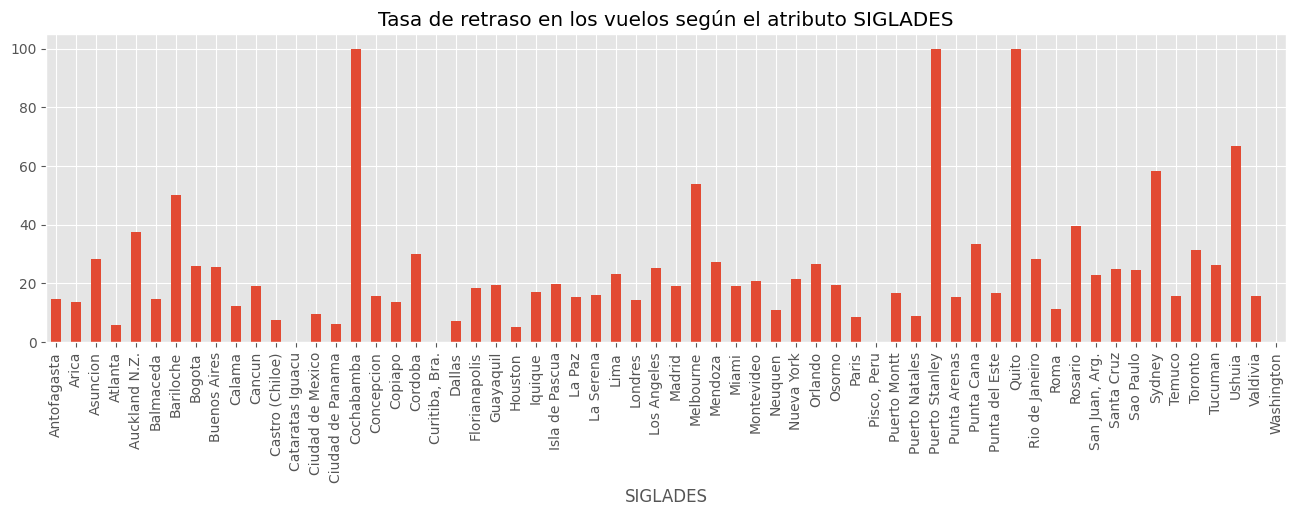

In [137]:
plot_distribution_against_delay(df, 'SIGLADES')

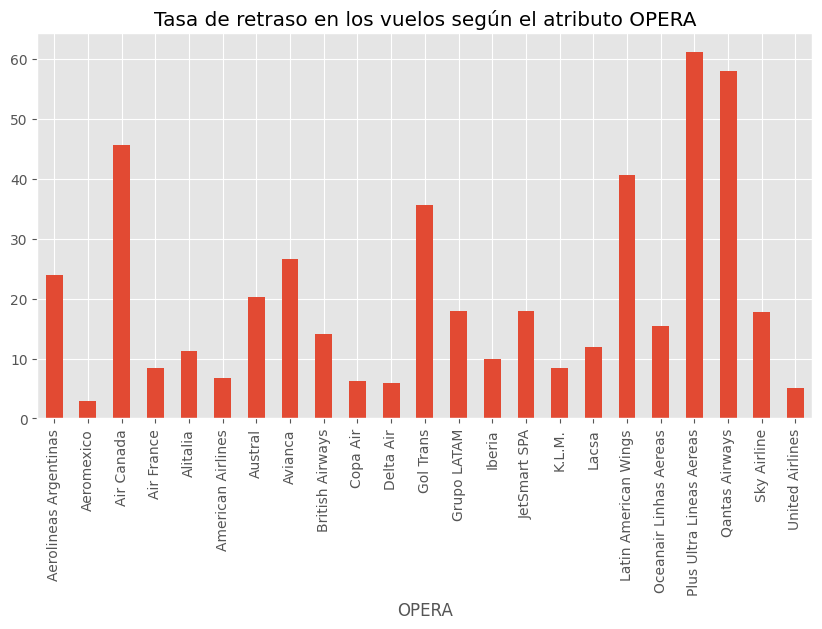

In [138]:
plot_distribution_against_delay(df, 'OPERA', width=10, height=5)

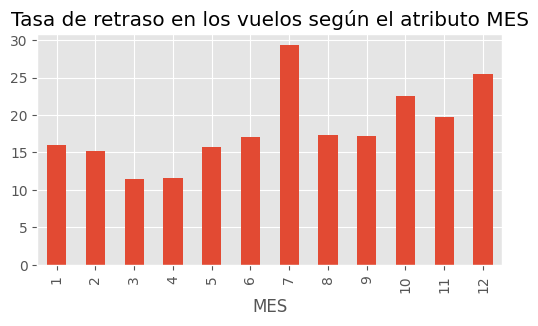

In [139]:
plot_distribution_against_delay(df, 'MES', width=6, height=3)

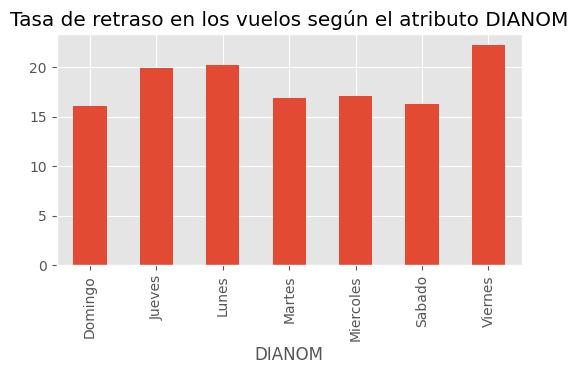

In [140]:
plot_distribution_against_delay(df, 'DIANOM', width=6, height=3)

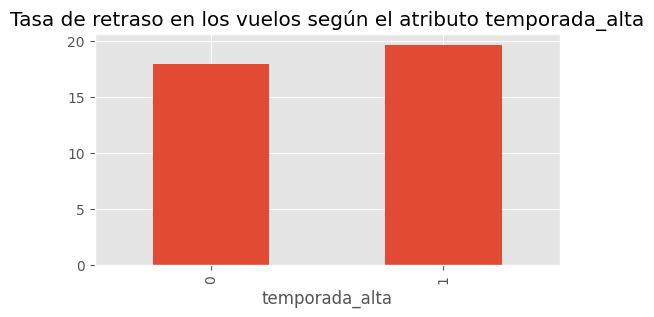

In [141]:
plot_distribution_against_delay(df, 'temporada_alta', width=6, height=3)

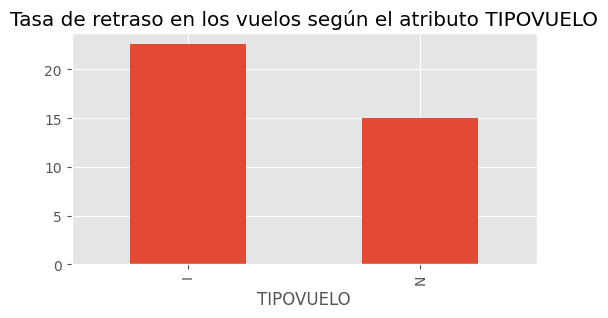

In [142]:
plot_distribution_against_delay(df, 'TIPOVUELO', width=6, height=3)

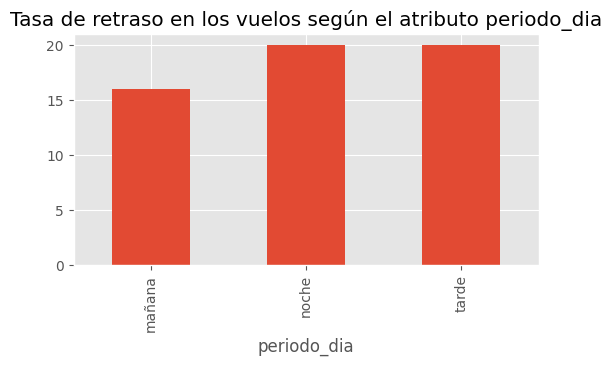

In [143]:
plot_distribution_against_delay(df, 'periodo_dia', width=6, height=3)

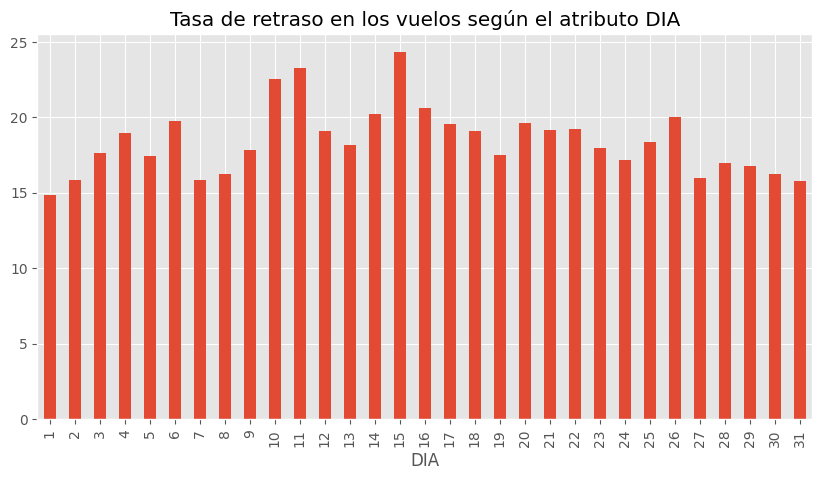

In [144]:
plot_distribution_against_delay(df, 'DIA', width=10, height=5)

#### **Pregunta 3. ¿Cuál es el comportamiento de la tasa de retraso según destino, aerolínea, mes del año, día de la semana, temporada y tipo de vuelo? ¿Qué variables esperarías que tengan mayor influencia en la predicción de retrasos?**

A continuación se realiza un análisis del comportamiento de la tasa de retraso por cada uno de los atributos solicitados. Posteriormente, se explicará la hipótesis acerca de los atributos que podrían tener un mayor grado de influencia a la hora de realizar predicciones con el modelo.

Destino: Según el gráfico, los destinos con mayor retraso son Cochabamba, Quito y Puerto Stanley, lo cuál podría deberse a factores climáticos, congestión en sus aeropuertos, problemas de gestión e infraestructura en los aeropuertos, entre otras razones. Por ejemplo, Cochabamba ubicado en Bolivia, es una región montañosa con altitudes elevadas y terrenos difíciles, Quito se encuentra en una región de Ecuador a una gran altitud y Puerto Stanley, ubicado en las Malvinas, es una región tan remota que puede tener inconvenientes en la gestión del aeropuerto o problemas en la ruta. 

Aerolinea: Según el gráfico, las aerolineas Plus Ultra Lineas Aereas y Qantas Airways son las que tienen mayor tasa de retraso porcentual, mientras que Aeromexico tiene la menor. Posibles razones pueden ser que estas aerolineas tengan como prioridad la eficiencia por sobre la optimización del tiempo, lo cual depende mucho del tipo de servicio que quieran entregar. Por otro lado, puede ocurrir que las rutas que toman estas aerolineas tengan un clima más deficiente o están más congestionadas, lo que puede afectar el retraso de los vuelos. 

Mes: Julio y Diciembre presentan la mayor cantidad de retrasos, mientras que Marzo posee la menor cantidad. Esto puede deberse a que las condiciones climáticas en esos meses no son las más óptimas; en el caso de destinos nacionales, Julio es época de invierno, mientras que en gran parte de los destinos internacionales esto ocurre en Diciembre.

Día: En el gráfico del día de la semana podemos apreciar que la mayor cantidad de retrasos se da los días Viernes y Lunes. Una posible razón es que coincida con días de alta demanda, es decir, feriados, fines de semana largos, eventos deportivos los fines de semanas, festivales, entre otras razones.

Temporada: Respecto a la temporada alta fue una sorpresa que no hubiese una diferencia más amplia en la distribución. Al parecer la temporada alta en general termina teniendo una tasa de retraso similar a la temporada baja. Esto podría deberse a que algunos meses pesan mucho menos/más que otros y se llega a una especia de *trade-off*. Por lo mismo, es importante verlo a nivel de mes, en vez de temporada.

Tipo Vuelo: Finalmente, tenemos que el tipo de vuelo puede influir bastante, ya que los vuelos internacionales tienden a ser trayectos más largos, y por ende estar sometidos a mayores cambios climatológicos, esto puede influir en el retraso de vuelos.

Adicionalmente, grafiqué el día y el periodo del día, notando que en las mañanas hay menor retraso y los días más extremos del mes hay mayor retraso.

La alta influencia que muestran algunos de estos atributos sobre la tasa de retraso podría significar un indicio de que serán unas buenas variables para entrenar los modelos. En particular, y dado el análisis anterior, considero que las variables más influyentes son las que tienen una mayor dispersión, ayudando a las decisiones del algoritmo. Dentro de las más influyentes podría estar el destino, la aerolinea, el mes y el tipo de vuelo.

## **Entrenamiento de modelos** <a name="model"></a>

### **Pregunta 4. Entrena uno o varios modelos (usando el/los algortimos de tu elección) para estimar la probabilidad de que un vuelo se atrase. Siéntete libre de generar variables adicionales y/o complementarlas con variables externas.**

La respuesta a esta pregunta/desafío se irá explicando mientras avance esta sección de entrenamiento de modelos.

Supuestos y decisiones tomadas.

- El problema puede abordarse como una clasificación binaria, donde el atributo retraso_15 sería el *target*. En otras palabras, si retraso_15 es igual 1, significa que el vuelo se atrasará, o no se atrasará en caso que sea 0. 

- Dado el análisis realizado en las secciones anteriores, los siguientes atributos serán considerados para el entrenamiento del modelo: **TIPOVUELO, OPERA, SIGLADES, MES, DIANOM, temporada_alta y periodo_dia.**

- Adicionalmente, se crearán dos atributos nuevos; hora y vuelos_paralelos. Esto permitirá saber la hora exacta en la que se produce el retraso (según la fecha programada del vuelo) y la cantidad de vuelos programados paralelamente en esa fecha.

### **Nuevos atributos**

In [145]:
df["hora"] = df["Fecha-I"].dt.hour

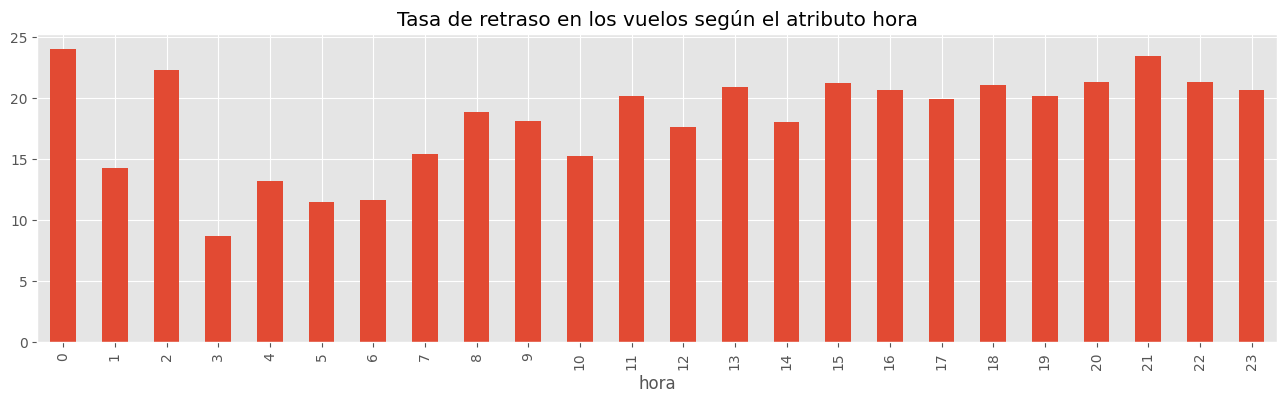

In [146]:
plot_distribution_against_delay(df, 'hora')

Del gráfico anterior podemos ver que entre más de noche es el vuelo, más retraso puede ocurrir, lo que puede ser información útil para el aprendizaje del modelo.

In [147]:
df['vuelos_paralelos'] = df.groupby(pd.Grouper(key='Fecha-I', freq='H'))['Fecha-I'].transform('size')

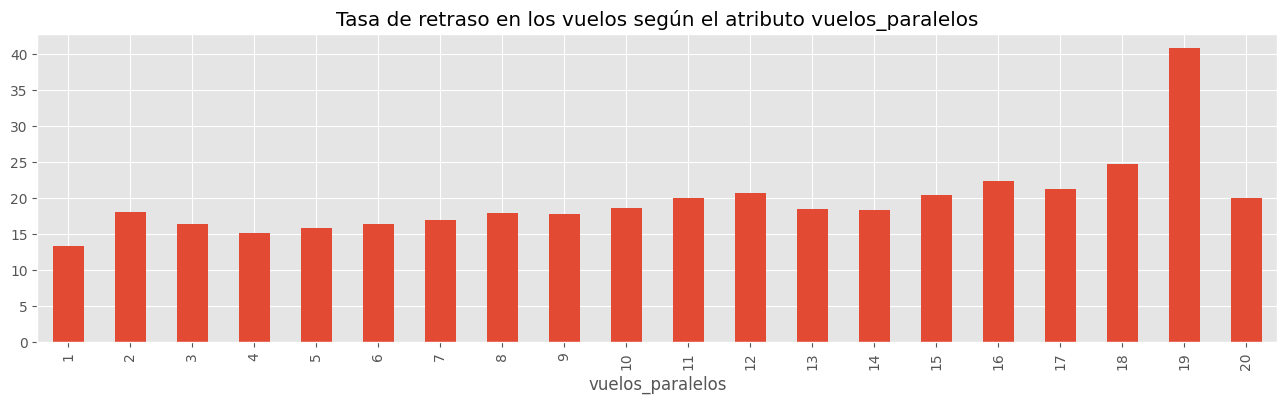

In [148]:
plot_distribution_against_delay(df, 'vuelos_paralelos')

Del gráfico anterior, se observa un comportamiento bien extraño. La tasa de retraso en los vuelos fue en promedio dos veces más alta que los otros casos. Como se ve en la siguiente celda, el número de ocasiones en que ocurrió esto fue 76 veces.

In [149]:
df['vuelos_paralelos'].value_counts()

11    8767
10    7800
12    7248
9     6993
13    6409
8     5728
7     4445
14    4088
6     3762
5     2805
15    2730
4     2048
16    1392
3     1296
2     1112
17     731
1      558
18     198
19      76
20      20
Name: vuelos_paralelos, dtype: int64

### **Filtro de atributos**

In [150]:
# Definimos los atributos a utilizar en nuestros experimentos
df = df[['TIPOVUELO', 'OPERA', 'SIGLADES', 'MES', 'DIANOM', 'temporada_alta', 'periodo_dia', 'hora', 'vuelos_paralelos', 'retraso_15']]

In [151]:
# Definimos la lista de columnas con datos numéricos y categóricos
num_cols = ['MES', 'temporada_alta', 'hora', 'vuelos_paralelos']
cat_cols = ['TIPOVUELO', 'OPERA', 'SIGLADES','DIANOM', 'periodo_dia']

Ahora que ya tenemos definidos los atributos, se definirán los modelos a entrenar. 

In [152]:
# Librerías importantes para el preprocesamiento de datos y entrenamiento de los modelos
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, mean_absolute_error, mean_absolute_error,mean_squared_error, r2_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from xgboost import plot_importance
from matplotlib import pyplot
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
import imblearn
warnings.filterwarnings('ignore')
import time

### **Modelo**

La elección del modelo correcto para la clasificación de los retrasos de vuelo y su probabilidad, depende de muchos factores, entre los cuáles podemos encontrar los siguientes:

1. Estimador. En nuestros experimentos, se trabajará con los siguientes clasificadores: SVC, LogisticRegression, RandomForestClassifier, Naive Bayes, Multi Layer Perceptron, SGD, KNeighborsClassifier.

2. Métrica de evaluación: El puntaje con el que se evaluará la clasificación debe tener en cuenta el desbalance de las clases. Es por esto, que utilizar sólo el accuracy no resulta suficiente. Para nuestros experimentos con el clasificador, se utilizarán las métricas accuracy (balanced), precision, recall y f1-score (weighted).


3. Manipulación de atributos: Hay que determinar cómo serán tratados los atributos numéricos y los atributos categóricos. En el caso de los numéricos, se realizará la clase StandardScaler para manejar datos en rangos de valores muy distintos, mientras que para el caso de los datos categóricos se probará transformar a números mediante el uso del LabelEncoder y la técnica de One-Hot Encoding. 

4. Balance de clases: Dado que hay muchos más datos asociados a la etiqueta 0 (no hay retraso del vuelo), es importante aplicar técnicas de balanceo sobre los datos. Estas técnicas pueden ser UnderSampling, OverSampling, Smote, entre otras. Es importante destacar que todo esto debe ser realizado sobre el conjunto de entrenamiento, para preservar la distribución original en el conjunto de test.

5. Optimización de hiperparámetros: Sin entrar en muchos detalles, la idea es obtener los mejores hiperparámetros posibles por cada uno de los modelos. Para realizar esto, se utilizará la técnica del Grid Search.

Dicho esto, a continuación se presentan los experimentos realizados y los principales resultados.

**Definición de métricas**

In [153]:
def compute_metrics(y_true, y_pred, probabilities):
    """
    Esta función recibe un arreglo de valores reales y predichos para 
    retornar un diccionario con una serie de métricas de regresión
    """
    return {
        'balanced_accuracy': balanced_accuracy_score(y_true, y_pred), 
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'mae': mean_absolute_error(y_true, probabilities),
        'rmse': mean_squared_error(y_true, probabilities) ** 0.5,
        'r2': r2_score(y_true, probabilities)
    }

**Definición de modelos**

In [154]:
models = {
    "LogisticRegression": LogisticRegression(),
    #"SVC": SVC(probability=True), #Este modelo lo dejaré comentado ya que tardaba mucho tiempo y nunca obtuvo los mejores resultados
    "RandomForestClassifier": RandomForestClassifier(),
    "GaussianNB": GaussianNB(),
    #"MLPClassifier": MLPClassifier(), #Este modelo lo dejaré comentado ya que tardaba mucho tiempo y nunca obtuvo los mejores resultados
    "SGDClassifier": CalibratedClassifierCV(SGDClassifier()),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "BernoulliNB": BernoulliNB(),
    "XGBClassifier": XGBClassifier()
}

#### **Experimento 1: Encoders**

En este experimento, vamos a mantener fijos los estimadores a probar y las métricas, y vamos a variar el pre-procesamiento de los datos categóricos y numéricos. En particular, probaremos usando Label Encoder y One Hot Encoding para datos categóricos, mientras que para los numéricos probaremos MinMaxScaler y StandardScaler.

In [155]:
cat_encoders = ["label_encoder", "one_hot_encoder"]
num_encoders = ["min_max", "standard"]

In [65]:
experiment_reports = {}

for cat_encoder in cat_encoders:
  for num_encoder in num_encoders: 
    X = df.drop("retraso_15", axis=1)
    y = df["retraso_15"]
    if cat_encoder=="label_encoder":
      le = LabelEncoder()

      for col in cat_cols:
        X[col] = le.fit_transform(X[col])

    else:
        X = pd.get_dummies(X, columns=cat_cols)
    
    if num_encoder=="min_max":
      scaler = MinMaxScaler()
    
    else:
      scaler = StandardScaler()

    X[num_cols] = scaler.fit_transform(X[num_cols])

    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123) # Se puede variar después el número de datos en cada partición

    reports = []
    for k,v in models.items():
      t0 = time.time()
      print(f"Ejecutando el modelo: {k}, usando el encoder {cat_encoder} para datos categóricos y {num_encoder} para datos numéricos")
      model = v 
      model.fit(X_train, y_train)
      print(f"Tiempo de entrenamiento: {round(time.time()-t0)} segundos.\n")
      y_pred = model.predict(X_test)
      probs = model.predict_proba(X_test)[:, 1]
      report = compute_metrics(y_test, y_pred, probs)
      reports.append(report)
    experiment_reports[f"Experimento: {cat_encoder} - {num_encoder}"]=reports

Ejecutando el modelo: LogisticRegression, usando el encoder label_encoder para datos categóricos y min_max para datos numéricos
Tiempo de entrenamiento: 0 segundos.

Ejecutando el modelo: RandomForestClassifier, usando el encoder label_encoder para datos categóricos y min_max para datos numéricos
Tiempo de entrenamiento: 5 segundos.

Ejecutando el modelo: GaussianNB, usando el encoder label_encoder para datos categóricos y min_max para datos numéricos
Tiempo de entrenamiento: 0 segundos.

Ejecutando el modelo: SGDClassifier, usando el encoder label_encoder para datos categóricos y min_max para datos numéricos
Tiempo de entrenamiento: 5 segundos.

Ejecutando el modelo: KNeighborsClassifier, usando el encoder label_encoder para datos categóricos y min_max para datos numéricos
Tiempo de entrenamiento: 0 segundos.

Ejecutando el modelo: BernoulliNB, usando el encoder label_encoder para datos categóricos y min_max para datos numéricos
Tiempo de entrenamiento: 0 segundos.

Ejecutando el mode

In [66]:
from tabulate import tabulate

for k, v in experiment_reports.items():
  performances = pd.DataFrame( 
      data = v,
      index = list(models.keys())
  ).sort_values( 
      by="f1"
  )
  print(k)
  print(tabulate(performances, headers='keys', tablefmt='psql'))

Experimento: label_encoder - min_max
+------------------------+---------------------+-------------+----------+----------+----------+----------+------------+
|                        |   balanced_accuracy |   precision |   recall |       f1 |      mae |     rmse |         r2 |
|------------------------+---------------------+-------------+----------+----------+----------+----------+------------|
| LogisticRegression     |            0.5      |    0        | 0        | 0        | 0.297678 | 0.388605 |  0.0267773 |
| GaussianNB             |            0.5      |    0        | 0        | 0        | 0.298345 | 0.389314 |  0.0232252 |
| SGDClassifier          |            0.5      |    0        | 0        | 0        | 0.303471 | 0.391826 |  0.0105779 |
| BernoulliNB            |            0.5      |    0        | 0        | 0        | 0.301763 | 0.391813 |  0.0106436 |
| XGBClassifier          |            0.559195 |    0.624138 | 0.138168 | 0.22625  | 0.267419 | 0.372448 |  0.106023  |
| K

Como se aprecia en la tabla anterior, el modelo que alcanza el mejor resultado según la clasificación y la métrica f1-score es el GaussianNB. Sin embargo, si vemos el mae, podemos ver que el modelo no es mejor que otros para calcular las probabilidades. Notar que independiente del desbalance de las clases, se obtiene un puntaje igual a 0.36. A continuación veremos que ocurre al cambiar las técnicas de balanceo

#### **Experimento 2: Balanceo**

Este experimento tiene como objetivo dejar fijos los encoders (el que dió mejor resultado del experimento 1) y lo que varía será la técnica de balanceo de datos; Oversampling, Undersampling & SMOTE.

In [68]:
tecnicas_de_balanceo = ["oversampling", "undersampling", "smote", "smote+undersampling"]
experiment_reports = {}

for tecnica in tecnicas_de_balanceo:
    X = df.drop("retraso_15", axis=1)
    y = df["retraso_15"]
    X = pd.get_dummies(X, columns=cat_cols)
    scaler = StandardScaler() 
    X[num_cols] = scaler.fit_transform(X[num_cols])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123) 

    if tecnica=="undersampling":
      rus = imblearn.under_sampling.RandomUnderSampler(random_state=11) 
      X_train, y_train = rus.fit_resample(X_train, y_train) 

    elif tecnica=="oversampling":
      ros = imblearn.over_sampling.RandomOverSampler(random_state=11) 
      X_train, y_train = ros.fit_resample(X_train, y_train)
    
    elif tecnica=="smote":
      sm = imblearn.over_sampling.SMOTE(random_state=11)
      X_train, y_train = sm.fit_resample(X_train, y_train)

    elif tecnica=="smote+undersampling":
      sm = imblearn.over_sampling.SMOTE(sampling_strategy=0.3,random_state=11) 
      rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.5,random_state=11) 
      steps = [('SMOTE', sm), ('RUS', rus)] 
      sm_rus = imblearn.pipeline.Pipeline(steps=steps) 
      X_train, y_train = sm_rus.fit_resample(X_train, y_train)

    reports = []
    for k,v in models.items():
      t0 = time.time()
      print(f"Ejecutando el modelo: {k}, usando la técnica {tecnica} para el balanceo")
      model = v 
      model.fit(X_train, y_train)
      print(f"Tiempo de entrenamiento: {round(time.time()-t0)} segundos.\n")
      y_pred = model.predict(X_test)
      probs = model.predict_proba(X_test)[:, 1]
      report = compute_metrics(y_test, y_pred, probs)
      reports.append(report)
    experiment_reports[f"Experimento: {tecnica}"]=reports

Ejecutando el modelo: LogisticRegression, usando la técnica oversampling para el balanceo
Tiempo de entrenamiento: 3 segundos.

Ejecutando el modelo: RandomForestClassifier, usando la técnica oversampling para el balanceo
Tiempo de entrenamiento: 17 segundos.

Ejecutando el modelo: GaussianNB, usando la técnica oversampling para el balanceo
Tiempo de entrenamiento: 0 segundos.

Ejecutando el modelo: SGDClassifier, usando la técnica oversampling para el balanceo
Tiempo de entrenamiento: 6 segundos.

Ejecutando el modelo: KNeighborsClassifier, usando la técnica oversampling para el balanceo
Tiempo de entrenamiento: 0 segundos.

Ejecutando el modelo: BernoulliNB, usando la técnica oversampling para el balanceo
Tiempo de entrenamiento: 0 segundos.

Ejecutando el modelo: XGBClassifier, usando la técnica oversampling para el balanceo
Tiempo de entrenamiento: 39 segundos.

Ejecutando el modelo: LogisticRegression, usando la técnica undersampling para el balanceo
Tiempo de entrenamiento: 1 seg

In [69]:
from tabulate import tabulate

for k, v in experiment_reports.items():
  performances = pd.DataFrame( 
      data = v,
      index = list(models.keys())
  ).sort_values( 
      by="f1"
  )
  print(k)
  print(tabulate(performances, headers='keys', tablefmt='psql'))

Experimento: oversampling
+------------------------+---------------------+-------------+----------+----------+----------+----------+-----------+
|                        |   balanced_accuracy |   precision |   recall |       f1 |      mae |     rmse |        r2 |
|------------------------+---------------------+-------------+----------+----------+----------+----------+-----------|
| RandomForestClassifier |            0.580462 |    0.311579 | 0.338931 | 0.32468  | 0.300957 | 0.452891 | -0.321849 |
| KNeighborsClassifier   |            0.589957 |    0.276014 | 0.477863 | 0.349916 | 0.338807 | 0.495285 | -0.580901 |
| GaussianNB             |            0.583317 |    0.234308 | 0.746565 | 0.356674 | 0.505924 | 0.652971 | -1.74778  |
| BernoulliNB            |            0.595463 |    0.266129 | 0.554198 | 0.359584 | 0.437051 | 0.492791 | -0.565021 |
| SGDClassifier          |            0.612147 |    0.277818 | 0.587023 | 0.377146 | 0.460666 | 0.479713 | -0.483057 |
| LogisticRegression  

Podemos ver que los mejores resultados fueron obtenidos utilizando la técnica de oversampling, es decir, aumentar los datos sobre la clase minoritaria. El modelo con mejores resultados en ese caso fue XGBOOST alcanzando un F1-Score de 0.42 y también uno de los MAE más bajos. Respecto al puntaje r2 aún quedan dudas, ya que entrega puntajes negativos, así que antes de analizar más en profundidad ese comportamiento, se probarán los modelos utilizando un grid search.

#### **Experimento 3: Optimización de hiperparámetros y validación**

In [156]:
grid_search = {
    "LogisticRegression": {
        "solver": ["lbfgs", "liblinear", "newton-cg", "saga"],
        "C": np.logspace(-3,3,7)
        #"penalty":["l1","l2"]
    }
    ,
    "RandomForestClassifier": {
      
    'n_estimators': [10, 50, 100],
    'max_depth' : [10, 100, None],
    'criterion' :['gini', 'entropy']

    },
    "GaussianNB": {
        "var_smoothing": [1e-5, 1e-7, 1e-9, 1e-11]
    },
    "SGDClassifier": {
        'l1_ratio': [0.01,0.1]
    },
    "KNeighborsClassifier": {
        "n_neighbors": [3,5,9]
    },
    "BernoulliNB": {
        "alpha": [10, 50, 100]
    },
    "XGBClassifier": {
        'max_depth': range (2, 5, 1),
        'n_estimators': range(60, 180, 40),
        'learning_rate': [0.01, 0.1]
    }
}

Por temas de costo computacional, se hará el Grid Search sobre los dos modelos con mejores puntajes en la parte anterior de acuerdo al f1-score y el de mejor puntaje de acuerdo a la métrica mae.

In [158]:
reports = []
for k in ["LogisticRegression", "XGBClassifier", "RandomForestClassifier"]:
  t0 = time.time()
  print(f"Ejecutando el Grid Search del modelo: {k}")
  X = df.drop("retraso_15", axis=1)
  y = df["retraso_15"]
  X = pd.get_dummies(X, columns=cat_cols)
  scaler = StandardScaler() 
  X[num_cols] = scaler.fit_transform(X[num_cols])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 
  ros = imblearn.under_sampling.RandomUnderSampler(random_state=11)
  X_train, y_train = ros.fit_resample(X_train, y_train)

  clf = GridSearchCV(models[k], param_grid = grid_search[k], cv = 5, verbose=10, n_jobs=-1)
  best_clf = clf.fit(X_train, y_train)
  print(f"Tiempo de entrenamiento Grid Search: {round(time.time()-t0)} segundos.\n")

  y_pred = best_clf.predict(X_test)
  probs = best_clf.predict_proba(X_test)[:, 1]
  report = compute_metrics(y_test, y_pred, probs)
  reports.append(report)
  print(k)
  print(best_clf.best_params_)
  print()

Ejecutando el Grid Search del modelo: LogisticRegression
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Tiempo de entrenamiento Grid Search: 2 segundos.

LogisticRegression
{'C': 0.1, 'solver': 'lbfgs'}

Ejecutando el Grid Search del modelo: XGBClassifier
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Tiempo de entrenamiento Grid Search: 8 segundos.

XGBClassifier
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 60}

Ejecutando el Grid Search del modelo: RandomForestClassifier
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Tiempo de entrenamiento Grid Search: 8 segundos.

RandomForestClassifier
{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 10}



In [159]:
from tabulate import tabulate

performances = pd.DataFrame( 
    data = reports,
    index = ["LogisticRegression", "XGBClassifier", "RandomForestClassifier"]
).sort_values( 
    by="f1"
)
print(k)
print(tabulate(performances, headers='keys', tablefmt='psql'))

RandomForestClassifier
+------------------------+---------------------+-------------+----------+----------+----------+----------+-----------+
|                        |   balanced_accuracy |   precision |   recall |       f1 |      mae |     rmse |        r2 |
|------------------------+---------------------+-------------+----------+----------+----------+----------+-----------|
| RandomForestClassifier |            0.568746 |    0.23871  | 0.627119 | 0.345794 | 0.481127 | 0.510698 | -0.650826 |
| LogisticRegression     |            0.593642 |    0.258741 | 0.627119 | 0.366337 | 0.476716 | 0.491103 | -0.526576 |
| XGBClassifier          |            0.61249  |    0.273381 | 0.644068 | 0.383838 | 0.470279 | 0.504258 | -0.609453 |
+------------------------+---------------------+-------------+----------+----------+----------+----------+-----------+


### **Mejor modelo**

In [ ]:
X = df.drop("retraso_15", axis=1)
y = df["retraso_15"]
X = pd.get_dummies(X, columns=cat_cols)
scaler = StandardScaler() 
X[num_cols] = scaler.fit_transform(X[num_cols])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123) 
ros = imblearn.over_sampling.RandomOverSampler(random_state=123)
X_train, y_train = ros.fit_resample(X_train, y_train)
model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.69      0.78      5511
           1       0.32      0.61      0.42      1310

    accuracy                           0.68      6821
   macro avg       0.60      0.65      0.60      6821
weighted avg       0.77      0.68      0.71      6821



In [ ]:
probs = model.predict_proba(X_test)[:, 1]
report = compute_metrics(y_test, y_pred, probs)

In [ ]:
report

{'balanced_accuracy': 0.6506497760897358,
 'precision': 0.3206938281565147,
 'recall': 0.6068702290076335,
 'f1': 0.41963578780680916,
 'mae': 0.409625450625558,
 'rmse': 0.4516529899585211,
 'r2': -0.31463191588413797}

                     feature  importance
0                       MES       917.0
3          vuelos_paralelos       819.0
2                      hora       534.0
1            temporada_alta       165.0
83           DIANOM_Viernes       141.0
..                      ...         ...
11            OPERA_Austral         3.0
52          SIGLADES_Madrid         3.0
74         SIGLADES_Tucuman         2.0
25     OPERA_Qantas Airways         2.0
69  SIGLADES_San Juan, Arg.         1.0

[87 rows x 2 columns]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

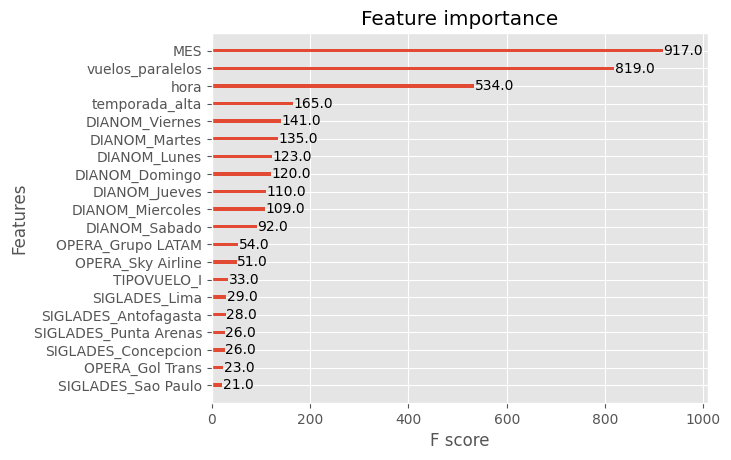

In [ ]:
xgb_fea_imp=pd.DataFrame(list(model.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
print('',xgb_fea_imp)
xgb_fea_imp.to_csv('xgb_fea_imp.csv')

plot_importance(model, max_num_features=20)